<a href="https://colab.research.google.com/github/sampritich/datasets/blob/master/Demo_for_timeseries_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Import dataset**

In [4]:
!wget https://www.dropbox.com/s/uwmbrcqnowrlltx/Time_series_end_To_end.zip

--2020-01-17 05:46:40--  https://www.dropbox.com/s/uwmbrcqnowrlltx/Time_series_end_To_end.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/uwmbrcqnowrlltx/Time_series_end_To_end.zip [following]
--2020-01-17 05:46:40--  https://www.dropbox.com/s/raw/uwmbrcqnowrlltx/Time_series_end_To_end.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca0282185db45d06d61680daee4.dl.dropboxusercontent.com/cd/0/inline/AwVv__-EYyZAmMW9NioUNo79p0BgZGqjdbm10oL8TRZTnn6foY6OOMbuX8AvUuih0aRGF_pc1OSeywc81HsknT-Bb1PyJr6pcs2Z2YW3hZ09BIytXJ1D67NOmeSXnPVSL7g/file# [following]
--2020-01-17 05:46:40--  https://uca0282185db45d06d61680daee4.dl.dropboxusercontent.com/cd/0/inline/AwVv__-EYyZAmMW9NioUNo79p0BgZGqjdbm10oL8TRZTnn6foY6OOMbuX8AvUuih0aRGF_pc

In [5]:
!unzip Time_series_end_To_end.zip

Archive:  Time_series_end_To_end.zip
  inflating: Time_series_end_To_end/ICICIBANK_v8qqcf.csv  
  inflating: Time_series_end_To_end/SeaPlaneTravel_jc4i8h.csv  
  inflating: Time_series_end_To_end/Timeseries_Analysis_ugbgil.ipynb  


# <b>Loading Dataset</b>

In [6]:
ic=pd.read_csv('/content/Time_series_end_To_end/ICICIBANK_v8qqcf.csv')
ic.head()

,Date,open,high,low,close,volume
0,2004-06-23,45.84,47.27,45.82,46.10,10997496
1,2004-06-24,45.82,47.96,43.87,46.21,12604239
2,2004-06-25,46.55,46.55,44.95,45.56,7008808
3,2004-06-28,45.91,46.36,44.64,45.98,7126519
4,2004-06-29,45.83,46.25,44.67,45.24,4857203


#Parse_dates

In [7]:
ic=pd.read_csv('/content/Time_series_end_To_end/ICICIBANK_v8qqcf.csv', parse_dates=True, index_col='Date')
ic.head()

,open,high,low,close,volume
Date,,,,,
2004-06-23,45.84,47.27,45.82,46.10,10997496
2004-06-24,45.82,47.96,43.87,46.21,12604239
2004-06-25,46.55,46.55,44.95,45.56,7008808
2004-06-28,45.91,46.36,44.64,45.98,7126519
2004-06-29,45.83,46.25,44.67,45.24,4857203


#Plot the close price value

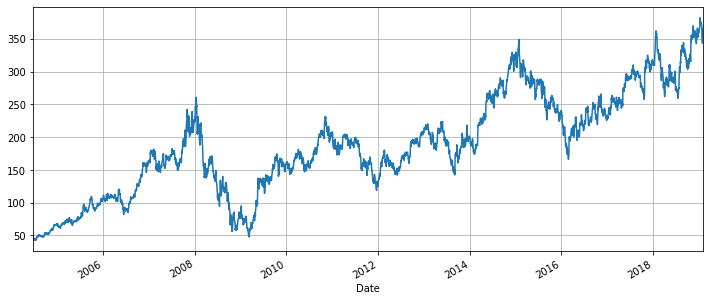

In [8]:
ic.close.plot(figsize=(12, 5), grid=True)
plt.show()

#Resample the data on the basis of month

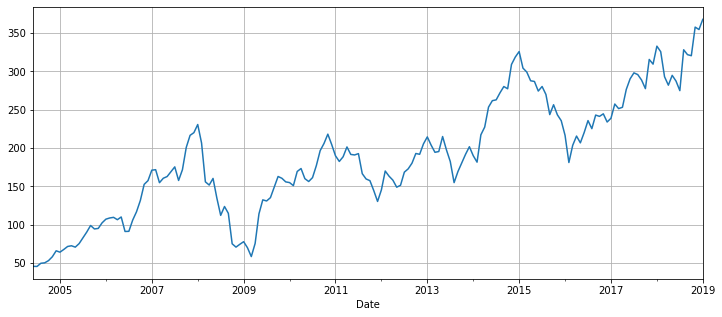

In [9]:
ic_resampled  = ic.close.resample('M').mean()
ic_resampled.plot(figsize=(12, 5), grid=True)
plt.show()

#Resample the data on the basis of Week

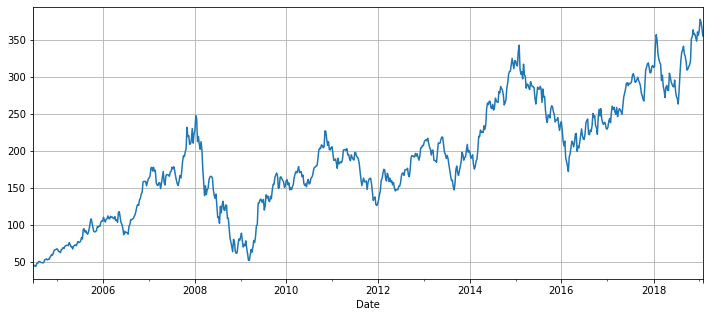

In [10]:
ic_resampled  = ic.close.resample('W').mean()
ic_resampled.plot(figsize=(12, 5), grid=True)
plt.show()

#Resampled data

In [12]:
ic_resampled.head()

Date
2004-06-27    45.956667
2004-07-04    45.048000
2004-07-11    43.834000
2004-07-18    43.496000
2004-07-25    47.314000
Freq: W-SUN, Name: close, dtype: float64

#close price value

In [13]:
ic.close.head(3)

Date
2004-06-23    46.10
2004-06-24    46.21
2004-06-25    45.56
Name: close, dtype: float64

#Applied rolling on the dataset

In [14]:
ic_rooling=ic.close.rolling(3).mean()
ic_rooling.head(5)

Date
2004-06-23          NaN
2004-06-24          NaN
2004-06-25    45.956667
2004-06-28    45.916667
2004-06-29    45.593333
Name: close, dtype: float64

#Visualize both  actual and the rolled column

In [16]:

ic['roll_mean'] = ic.close.rolling(5).mean()
ic.loc[:, ['roll_mean', 'close']].head(10)


,roll_mean,close
Date,,
2004-06-23,NaN,46.10
2004-06-24,NaN,46.21
2004-06-25,NaN,45.56
2004-06-28,NaN,45.98
2004-06-29,45.818,45.24
2004-06-30,45.488,44.45
2004-07-01,45.256,45.05
2004-07-02,45.048,44.52
2004-07-05,44.410,42.79


#Graph after rolling and without rolling on close price

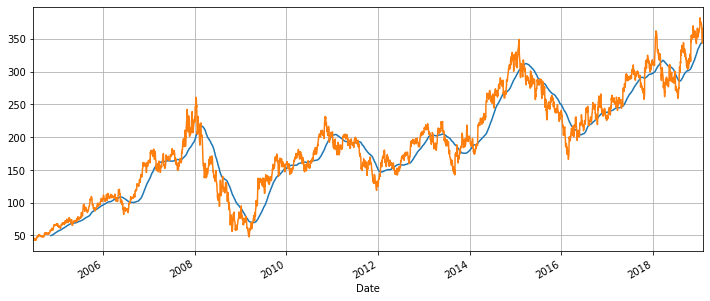

In [17]:
ic_rolling  = ic.close.rolling(100).mean()
ic_rolling.plot(figsize=(12, 5), grid=True)
ic.close.plot(figsize=(12, 5), grid=True)
plt.show()

## Test for Stationarity
#using Augmented Dickey Fuller Test

In [0]:
from statsmodels.tsa.stattools import adfuller

In [23]:
adfuller(ic_resampled)

(-1.408955016001226,
 0.5779755213187958,
 1,
 761,
 {'1%': -3.4389722010249386,
  '10%': -2.5687964010457227,
  '5%': -2.8653454308425705},
 5198.022589802209)

# p value for the data

In [24]:
adfuller(ic_resampled)[1]# p value only

0.5779755213187958

# P value is more than 0.05 <br>
So, fail to reject the null hypothesis<br>
<b>Conclude: Data is nonstationary</b>

### Converting non stationary to stationary
* diff(), sometimes multiple times
* log
* sqrt
* df.shift(1)/df: Proportional
__Often simple solution(diff) is the best one__

In [25]:
ic_resampled.head()

Date
2004-06-27    45.956667
2004-07-04    45.048000
2004-07-11    43.834000
2004-07-18    43.496000
2004-07-25    47.314000
Freq: W-SUN, Name: close, dtype: float64

#using log method

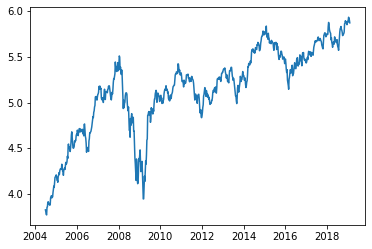

In [26]:
import numpy as np
import matplotlib.pyplot as plt
ts=ic_resampled
ts_log = np.log(ts)
plt.plot(ts_log)

In [27]:
ts_log.head()
ts_log.to_frame().head()

,close
Date,
2004-06-27,3.827699
2004-07-04,3.807729
2004-07-11,3.780410
2004-07-18,3.772669
2004-07-25,3.856806


In [28]:
ts.to_frame().head()

,close
Date,
2004-06-27,45.956667
2004-07-04,45.048000
2004-07-11,43.834000
2004-07-18,43.496000
2004-07-25,47.314000


#Check for Stationarity

In [29]:
result = adfuller(ts_log)
print('Augmented Dickey Fuller Test')
print("After log transformation ")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

Augmented Dickey Fuller Test
After log transformation 
ADF Statistic: -2.449203
p-value: 0.128328
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


# P value is more than 0.05 *italicized text*<br>
So, fail to reject the null hypothesis<br>
<b>Conclude: Data is nonstationary</b>

# using diff()

In [30]:
ic_resampled.diff().head()

Date
2004-06-27         NaN
2004-07-04   -0.908667
2004-07-11   -1.214000
2004-07-18   -0.338000
2004-07-25    3.818000
Freq: W-SUN, Name: close, dtype: float64

#Test for stationarity

In [31]:
result = adfuller(ts_log)
print('Augmented Dickey Fuller Test')
print("After log transformation ")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

Augmented Dickey Fuller Test
After log transformation 
ADF Statistic: -2.449203
p-value: 0.128328
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


In [0]:
ic_stationary=ic_resampled.diff().diff().dropna().head()

### Remember Dickey fuller tests only Trend stationarity. So visualisation is not replacable

In [35]:
adfuller(ic_stationary)[1]

0.03483785646984696

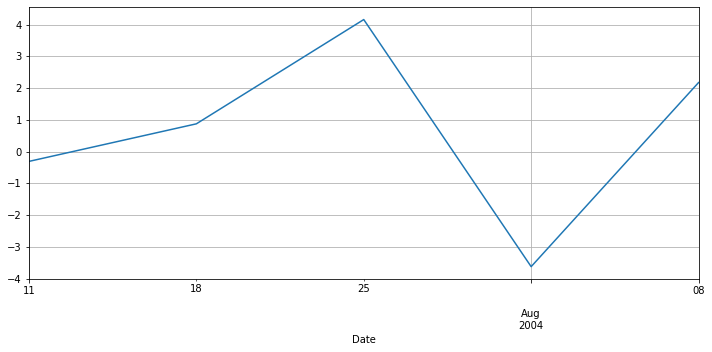

In [37]:
ic_stationary.plot(figsize=(12, 5), grid=True)
plt.show()

#Using squareroot 

In [0]:
ic_square_stationarity=np.sqrt(ic_resampled)

In [39]:
adfuller(ic_square_stationarity)[1]

0.362929318062669

In [0]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=52).mean() 
    rolstd = timeseries.rolling(window=52).std()
    #Plot rolling statistics:
    plt.figure(figsize=(12,3))
    plt.grid(True)
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries)[1]
    print('p_value: ', dftest)

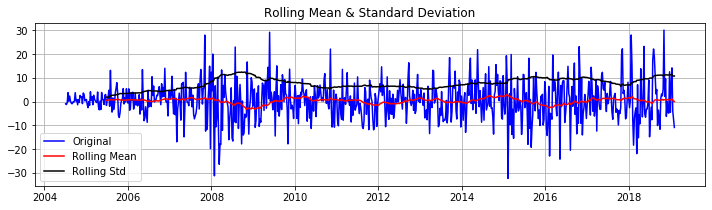

Results of Dickey-Fuller Test:
p_value:  0.0


In [42]:
test_stationarity(ic_resampled.diff().dropna())


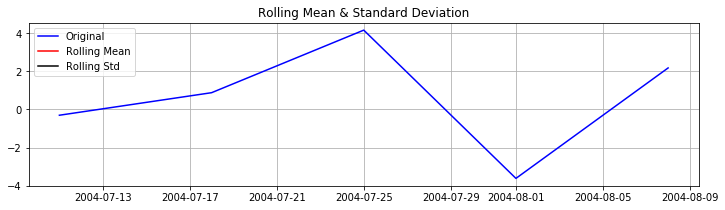

Results of Dickey-Fuller Test:
p_value:  0.03483785646984696


In [41]:
#test_stationarity(ic_resampled.diff().dropna())
test_stationarity(ic_stationary)

## ARMA models
* __Requires the data to be Stationary__

### Auto Regressive AR Model

__AR(1)__

### \begin{equation*}P(today) = Mean  +  Coeff*P(yesterday) + Noise \end{equation*}
### \begin{equation*}P(t) = \mu + \gamma1*P(t-1) + \epsilon \end{equation*}

* __If gamma = 0 model is Mean plus noise__

__AR(2)__

### \begin{equation*}P(t) = \mu + \gamma1*P(t-1) +  \gamma2*P(t-2) + \epsilon \end{equation*}

### Moving Average MA Model

MA(1) Model

### \begin{equation*}P(t) = \mu + \theta1*\epsilon(t-1) + \epsilon(t) \end{equation*}

MA(2) Model

### \begin{equation*}P(t) = \mu + \theta2*\epsilon(t-2) + \theta1*\epsilon(t-1) + \epsilon(t) \end{equation*}


### ARMA Model

ARMA(1,1)

### \begin{equation*}P(t) = \mu +  \gamma1*P(t-1) + \theta1*\epsilon(t-1) + \epsilon(t) \end{equation*}

In [43]:
ic_resampled.diff().dropna().autocorr(3)

-0.014092986934383541

# ACF- PACF to determine lags the model (AR, MA, ARMA) and lags(p and q)

In [0]:
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#example to find ACF and PACF

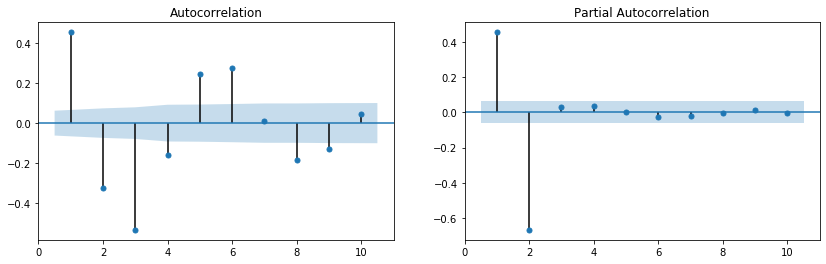

In [45]:
ar_coeffs = [1, -0.8, 0.7] # 1 is for the 0 lag term, this is always set to 1. The sign of coefficients is reverse
ma_coeffs = [1, 0]  # 1 is for the 0 lag term, this is always set to 1
y = arma_generate_sample(ar_coeffs, ma_coeffs, nsample=1000)
fig, ax = plt.subplots(1,2, figsize = (14,4))
plot_acf(y, lags=10, zero=False, ax=ax[0])
plot_pacf(y, lags=10, zero=False, ax=ax[1])
plt.show()

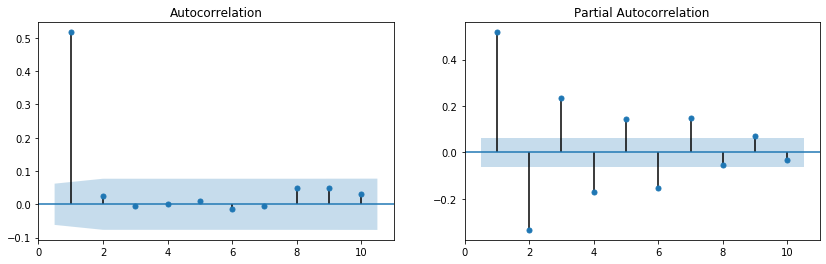

In [46]:
ar_coeffs = [1, 0] # 1 is for the 0 lag term, this is always set to 1. The sign of coefficients is reverse
ma_coeffs = [1, 0.9]  # 1 is for the 0 lag term, this is always set to 1
y = arma_generate_sample(ar_coeffs, ma_coeffs, nsample=1000)
fig, ax = plt.subplots(1,2, figsize = (14,4))
plot_acf(y, lags=10, zero=False, ax=ax[0])
plot_pacf(y, lags=10, zero=False, ax=ax[1])
plt.show()

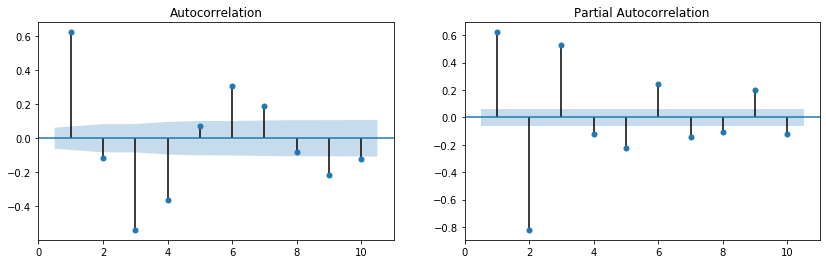

In [47]:
ar_coeffs = [1, -0.8, 0.7] # 1 is for the 0 lag term, this is always set to 1. The sign of coefficients is reverse
ma_coeffs = [1, 0.9, 0.7]  # 1 is for the 0 lag term, this is always set to 1
y = arma_generate_sample(ar_coeffs, ma_coeffs, nsample=1000)
fig, ax = plt.subplots(1,2, figsize = (14,4))
plot_acf(y, lags=10, zero=False, ax=ax[0])
plot_pacf(y, lags=10, zero=False, ax=ax[1])
plt.show()

## If the model is ARMA we have to try different models to find the right one

In [0]:
from statsmodels.tsa.arima_model import ARMA

In [0]:
ar_coeffs = [1, -0.8, 0.7] # 1 is for the 0 lag term, this is always set to 1. The sign of coefficients is reverse
ma_coeffs = [1, 0.9, 0.7]  # 1 is for the 0 lag term, this is always set to 1
y = arma_generate_sample(ar_coeffs, ma_coeffs, nsample=1000)

In [50]:
model = ARMA(y, order=(2, 2))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(2, 2)   Log Likelihood               -1437.881
Method:                       css-mle   S.D. of innovations              1.017
Date:                Fri, 17 Jan 2020   AIC                           2887.763
Time:                        06:03:38   BIC                           2917.209
Sample:                             0   HQIC                          2898.954
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2249      0.090      2.492      0.013       0.048       0.402
ar.L1.y        0.7550      0.025     29.607      0.000       0.705       0.805
ar.L2.y       -0.6918      0.025    -27.806      0.000      -0.741      -0.643
ma.L1.y        0.9129      0.025     36.360      0.000       0.864       0.962
ma.L2.y        0.7172      0.023     30.943      0.000       0.672       0.763
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.5456           -1.0713j            1.2023           -0.1750
AR.2            0.5456           +1.0713j            1.2023            0.1750
MA.1           -0.6364           -0.9946j            1.1808           -0.3406
MA.2           -0.6364           +0.9946j            1.1808            0.3406
-----------------------------------------------------------------------------
"""

In [51]:
results.bic

2917.2091434103672

In [0]:
# We will use Akaikan and Bayesian Information Coeffecient to find the lags
order_aic_bic=[]
# Loop over p values 
for p in range(5):
  # Loop over q values 
    for q in range(5):
      	# create and fit ARMA(p,q) model
        try:
            model = ARMA(y, order=(p, q))
            results = model.fit()
            # Append order and results tuple
            order_aic_bic.append((p, q, results.aic, results.bic))
        except:
            order_aic_bic.append((p, q, None, None))            

In [53]:
df_pq = pd.DataFrame(order_aic_bic, columns=['p', 'q', 'aic', 'bic'])
df_pq.sort_values(by='aic').head()

,p,q,aic,bic
12,2,2,2887.762612,2917.209143
14,2,4,2887.834810,2927.096852
22,4,2,2888.653481,2927.915523
17,3,2,2889.103867,2923.458154
13,2,3,2889.222467,2923.576754


# Arima Model

In [54]:
ic_resampled.tail()

Date
2019-01-06    363.3900
2019-01-13    377.6300
2019-01-20    373.6000
2019-01-27    366.0300
2019-02-03    355.1875
Freq: W-SUN, Name: close, dtype: float64

In [55]:
ic_resampled.diff().dropna().tail()

Date
2019-01-06     7.1400
2019-01-13    14.2400
2019-01-20    -4.0300
2019-01-27    -7.5700
2019-02-03   -10.8425
Freq: W-SUN, Name: close, dtype: float64

In [0]:
model = ARMA(ic_resampled.diff().dropna(), order=(2, 1))
results = model.fit()

In [57]:
len(ic_resampled.diff().dropna())

762

In [58]:
results.predict(760, 768)

2019-01-27   -0.615894
2019-02-03   -0.772077
2019-02-10   -0.853117
2019-02-17    0.456990
2019-02-24    0.589142
2019-03-03    0.569784
2019-03-10    0.537597
2019-03-17    0.509918
2019-03-24    0.487797
Freq: W-SUN, dtype: float64

In [59]:
results.forecast()

(array([-0.85311744]),
 array([7.90361875]),
 array([[-16.34392553,  14.63769065]]))

### The predictions are for differenced values. We would need to use cumsum to get to absolute predictions.  ARIMA takes care of these things

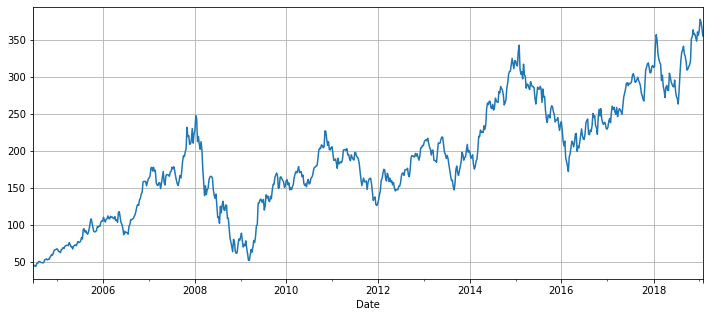

In [69]:
ab=ic_resampled
ab.plot(figsize=(12, 5), grid=True)

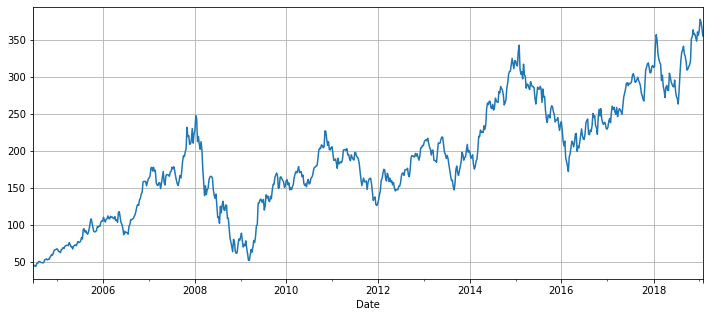

In [70]:
ts_week = ab.resample('W').mean()
ts_week.plot(figsize=(12, 5), grid=True)
plt.show()

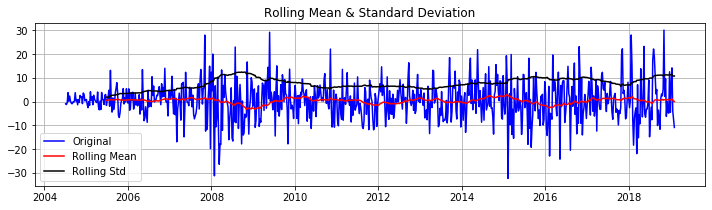

Results of Dickey-Fuller Test:
p_value:  0.0


In [74]:
ts_diff = ts_week.diff().dropna()
ts_diff
test_stationarity(ts_diff)


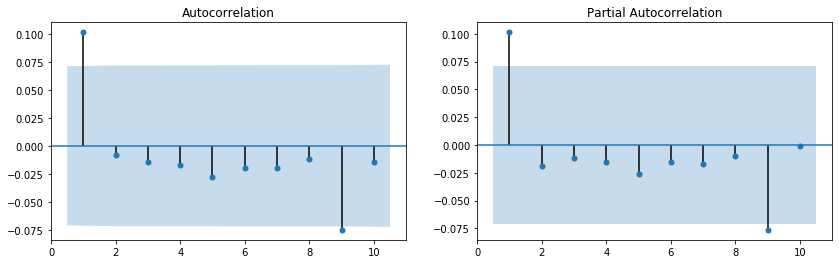

In [75]:
#ACF and PACF
fig, ax = plt.subplots(1,2, figsize = (14,4))
plot_acf(ts_diff, lags=10, zero=False, ax=ax[0])
plot_pacf(ts_diff, lags=10, zero=False, ax=ax[1])
plt.show()

In [0]:
#Lets 
order_aic_bic=[]
# Loop over p values 
for p in range(5):
  # Loop over q values 
    for q in range(5):
      	# create and fit ARMA(p,q) model
        try:
            model = ARMA(ts_diff, order=(p, q))
            results = model.fit()
            # Append order and results tuple
            order_aic_bic.append((p, q, results.aic, results.bic))
        except:
            order_aic_bic.append((p, q, None, None))

In [77]:
df_pq = pd.DataFrame(order_aic_bic, columns=['p', 'q', 'aic', 'bic'])
df_pq.sort_values(by='aic').head()

,p,q,aic,bic
23,4,3,5320.096232,5361.819751
1,0,1,5320.326583,5334.234422
5,1,0,5320.524204,5334.432044
10,2,0,5322.258449,5340.802235
2,0,2,5322.300350,5340.844137


# Lets create an ARIMA Model to predict stock market prediction

### Steps to follow:
* Is the dataset stationary? (adfuller)
* if not, what order of differencing will make it stationary (transform the data)
* What values of p and q lags would be best (Try ACF/PACF plots or AIC/BIC approach)
* Fit the model
* Check the results    

# Identify the p and q lags

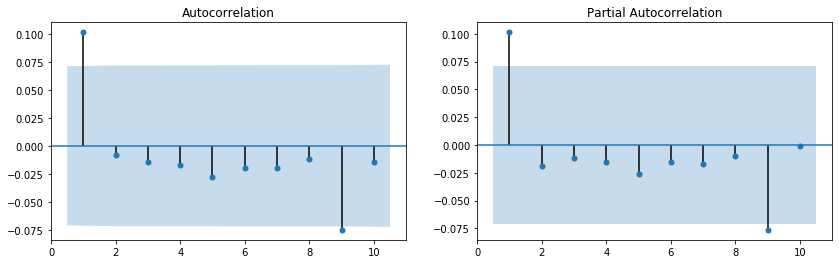

In [78]:
#ACF and PACF
fig, ax = plt.subplots(1,2, figsize = (14,4))
plot_acf(ts_diff, lags=10, zero=False, ax=ax[0])
plot_pacf(ts_diff, lags=10, zero=False, ax=ax[1])
plt.show()

In [0]:
#Lets 
order_aic_bic=[]
# Loop over p values 
for p in range(5):
  # Loop over q values 
    for q in range(5):
      	# create and fit ARMA(p,q) model
        try:
            model = ARMA(ts_diff, order=(p, q))
            results = model.fit()
            # Append order and results tuple
            order_aic_bic.append((p, q, results.aic, results.bic))
        except:
            order_aic_bic.append((p, q, None, None)) 

In [80]:
df_pq = pd.DataFrame(order_aic_bic, columns=['p', 'q', 'aic', 'bic'])
df_pq.sort_values(by='aic').head()

,p,q,aic,bic
23,4,3,5320.096232,5361.819751
1,0,1,5320.326583,5334.234422
5,1,0,5320.524204,5334.432044
10,2,0,5322.258449,5340.802235
2,0,2,5322.300350,5340.844137


# ARIMA Model Implementation

In [0]:
from statsmodels.tsa.arima_model import ARIMA

In [0]:
model = ARIMA(ts_week, order=(3, 1, 3))  
results_ARIMA = model.fit()

In [84]:
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                  762
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -2655.351
Method:                       css-mle   S.D. of innovations              7.891
Date:                Fri, 17 Jan 2020   AIC                           5326.703
Time:                        06:16:50   BIC                           5363.790
Sample:                    07-04-2004   HQIC                          5340.983
                         - 02-03-2019                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4054      0.299      1.355      0.176      -0.181       0.992
ar.L1.D.close     1.5130      0.723      2.094      0.037       0.097       2.929
ar.L2.D.close    -0.5645      1.025     -0.551      0.582      -2.573       1.444
ar.L3.D.close    -0.2005      0.439     -0.457      0.648      -1.060       0.659
ma.L1.D.close    -1.4134      0.724     -1.953      0.051      -2.832       0.005
ma.L2.D.close     0.4129      0.946      0.436      0.663      -1.442       2.267
ma.L3.D.close     0.2641      0.370      0.714      0.475      -0.461       0.989
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9238           -0.4649j            1.0342           -0.0742
AR.2            0.9238           +0.4649j            1.0342            0.0742
AR.3           -4.6634           -0.0000j            4.6634           -0.5000
MA.1            0.9380           -0.4701j            1.0492           -0.0739
MA.2            0.9380           +0.4701j            1.0492            0.0739
MA.3           -3.4393           -0.0000j            3.4393           -0.5000
-----------------------------------------------------------------------------
"""

In [85]:
# Analyse residual errors. They should be normal
residuals = pd.DataFrame(results_ARIMA.resid)
print(residuals.describe())

                0
count  762.000000
mean     0.000035
std      7.896232
min    -34.057324
25%     -4.342164
50%     -0.077688
75%      4.324043
max     29.173381


# Future Prediction Using ARIMA Model

In [87]:
len(ts_week)

763

In [89]:
ts_week.tail()

Date
2019-01-06    363.3900
2019-01-13    377.6300
2019-01-20    373.6000
2019-01-27    366.0300
2019-02-03    355.1875
Freq: W-SUN, Name: close, dtype: float64

In [92]:
results_ARIMA.forecast()

(array([355.79389824]),
 array([7.89103208]),
 array([[340.32775956, 371.26003692]]))

In [94]:
predictions = []
for x in np.arange(-5, 0):
    model = ARIMA(ts_week.iloc[:x], order=(3, 1, 3))  
    results_ARIMA = model.fit()
    predictions.append(results_ARIMA.forecast()[0])
predictions=np.array(predictions).ravel()
predictions

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: Converge

array([354.12634104, 363.85170818, 378.64087699, 374.21617137,
       367.43850113])

In [96]:
actual = ts_week.tail()
actual

Date
2019-01-06    363.3900
2019-01-13    377.6300
2019-01-20    373.6000
2019-01-27    366.0300
2019-02-03    355.1875
Freq: W-SUN, Name: close, dtype: float64

In [0]:
from sklearn.metrics import mean_squared_error

In [98]:
error = mean_squared_error(actual, predictions)
print('Test MSE: %.6f' % error)

Test MSE: 103.633515


In [99]:
predictions_series = pd.Series(predictions, index = actual.index)
predictions_series

Date
2019-01-06    354.126341
2019-01-13    363.851708
2019-01-20    378.640877
2019-01-27    374.216171
2019-02-03    367.438501
Freq: W-SUN, dtype: float64

# Future Forecasting Using ARIMA Model

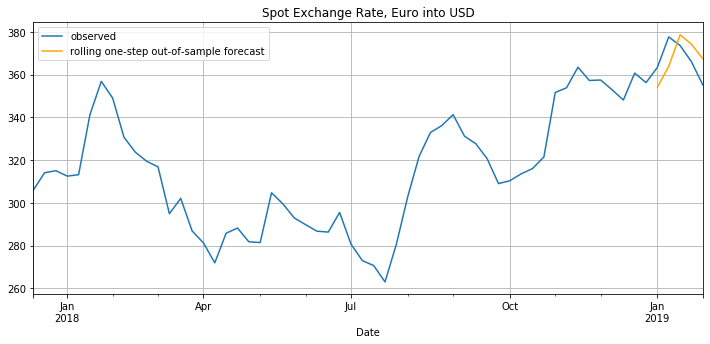

In [100]:
ts_week[-60:].plot(figsize=(12, 5), grid=True, label= 'observed')
predictions_series.plot(c='orange', figsize=(12, 5), grid=True, label='rolling one-step out-of-sample forecast')
plt.title('Spot Exchange Rate, Euro into USD')
plt.legend()
plt.show()

__Topics you can Explore further:__
* Arimax models
* Seasonal models of ARIMA

![](https://media.giphy.com/media/xT0xezQGU5xCDJuCPe/giphy.gif )


---



